# import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
from nilearn.input_data import NiftiLabelsMasker
from nilearn import input_data, datasets
from nilearn import plotting
from nilearn.image import new_img_like
import nilearn
import pandas as pd

c:\users\shelby\anaconda3\envs\shelby_neuroimaging\lib\site-packages\nilearn\datasets\__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
#1 set up the files 1 masker file, 1 funct file, import relevant stuff
atlas_filename  = '../data_realcost/masker/shen_2mm_268_parcellation.nii'
sample_file     = '../data_realcost/masker/func.nii' #just sample data for fitting 

shen_file       = '../data_realcost/masker/shen_2mm_268_parcellation.nii'

shen_masker = input_data.NiftiLabelsMasker(shen_file, 
                                             detrend     = True, 
                                             standardize = True,
                                             high_pass   = 0.01, 
                                             t_r         = 1.0,  #check!
                                             low_pass    = 0.12 );

#2 set up the masker and fit it on some file
shen_masker     = NiftiLabelsMasker(labels_img= atlas_filename);
shen_masker.fit_transform(sample_file);


# define onsets

In [3]:
onsets_view   =  [6,66,127,187,248,308,369,429,490,550,611,671]
print(len(onsets_view))

onsets_imagine = [47,108,168,229,289,350,410,471,531,592,652,713]
print(len(onsets_imagine))

subjs = ['PSA038','PSA009','PSA078','PSA153','PSA131','PSA086','PSA144','PSA108','PSA030','PSA041',
         'PSA068','PSA056','PSA132','PSA019','PSA027','PSA028','PSA016','PSA005','PSA061','PSA010',
         'PSA128','PSA003','PSA156','PSA119','PSA032','PSA127','PSA079','PSA094','PSA008','PSA036',
         'PSA112','PSA007','PSA151','PSA120','PSA017','PSA029','PSA026','PSA069','PSA142','PSA109']
print(len(subjs))


12
12
40


# load one example file

In [4]:
curr_file   = '../data_realcost/' + subjs[0] + '_shen_extracted_hp001_lp012_ltr_stand.npy'
#print(curr_file)

current_time_series = np.load(curr_file)
print(current_time_series.shape)

(735, 268)


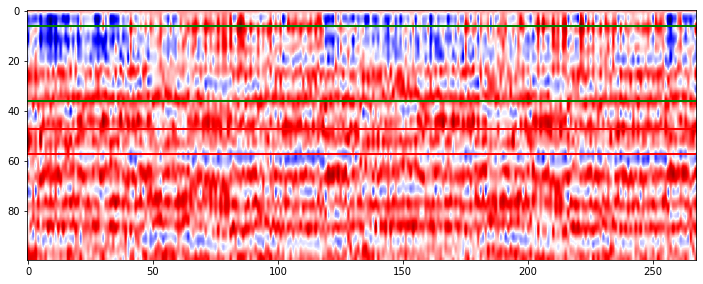

In [5]:
plt.figure(figsize = (12,60))
plt.imshow(current_time_series[:100, :], cmap = 'seismic', interpolation = None);
plt.axhline(6, color = 'green', linewidth=2)
plt.axhline(36, color = 'green', linewidth=2)

plt.axhline(47, color = 'red', linewidth=2)
plt.axhline(57, color = 'red', linewidth=2)

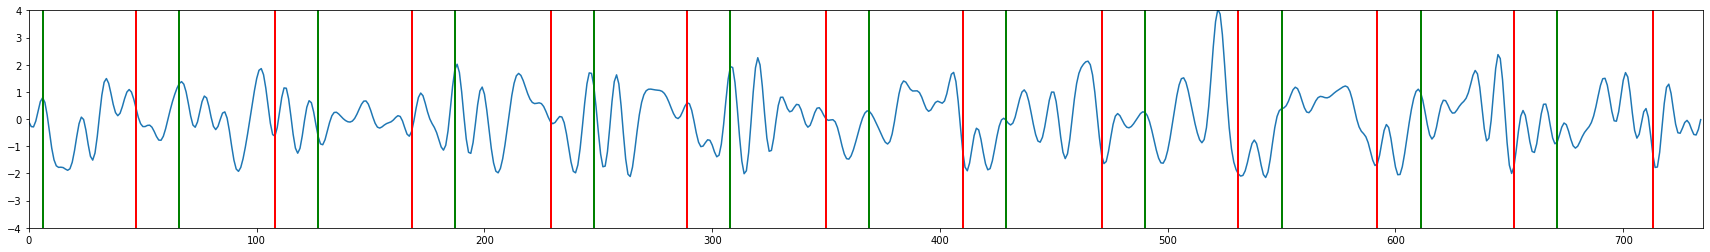

In [44]:
plt.figure(figsize = (30,4))
plt.plot(current_time_series[:, 68])

zipped_onsets = zip(onsets_view,onsets_imagine)

for x,y in zipped_onsets:
    plt.axvline(x, color = 'green', linewidth=2)
    plt.axvline(y, color = 'red', linewidth=2)

plt.xlim([0, current_time_series.shape[0]]);
plt.ylim([-4, 4]);

# combine time series data

In [33]:
all_data = []

for curr_sub in subjs:
    data_file_to_load   = '../data_realcost/' + curr_sub + '_shen_extracted_hp001_lp012_ltr_stand.npy'
    #print(data_file_to_load)
    curr_data = np.load(data_file_to_load)
    #print(curr_data.shape)
    all_data.append(curr_data)

all_data = np.asarray(all_data)
print(all_data.shape)

#data_file_to_load   = '../data_realcost/' + subjs[2] + '_shen_extracted_hp001_lp012_ltr_stand.npy'
#print(data_file_to_load)

#current_time_series = np.load(data_file_to_load)
#current_time_series.shape

(40, 735, 268)


In [45]:
shen_dict = np.load('../data_realcost/shen_dictionary.npy', allow_pickle=True).item()
shen_dict[68]['name']

'45.02% Lingual_Gyrus; 42.60% Temporal_Occipital_Fusiform_Cortex; 6.43% Parahippocampal_Gyrus_posterior_division; 5.63% Temporal_Fusiform_Cortex_posterior_division'

In [43]:
for i in range(1,269):
    print(i)
    print(shen_dict[i]['name'])

1
92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex
2
60.56% Subcallosal_Cortex; 38.73% Frontal_Orbital_Cortex
3
58.54% Frontal_Medial_Cortex; 34.55% Subcallosal_Cortex
4
54.15% Frontal_Pole; 41.86% Frontal_Orbital_Cortex
5
47.25% Paracingulate_Gyrus; 25.03% Cingulate_Gyrus_anterior_division; 16.35% Frontal_Medial_Cortex; 10.86% Frontal_Pole
6
100.00% Frontal_Pole
7
100.00% Frontal_Pole
8
99.85% Frontal_Pole
9
100.00% Frontal_Pole
10
48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus
11
52.15% Frontal_Pole; 47.85% Middle_Frontal_Gyrus
12
56.57% Superior_Frontal_Gyrus; 41.14% Frontal_Pole
13
33.82% Middle_Frontal_Gyrus; 33.82% Frontal_Pole; 26.94% Superior_Frontal_Gyrus; 5.42% no_label
14
98.80% Middle_Frontal_Gyrus
15
58.36% Cingulate_Gyrus_anterior_division; 41.00% Paracingulate_Gyrus
16
42.87% Inferior_Frontal_Gyrus_pars_triangularis; 25.98% Inferior_Frontal_Gyrus_pars_opercularis; 12.25% Frontal_Orbital_Cortex; 10.24% Frontal_Pole; 6.02% Frontal_Operculum_

{'coords': [8.047619047619051, -22.923809523809524, 44.99047619047619], 'name': '47.38% Precentral_Gyrus; 46.19% Cingulate_Gyrus_posterior_division; 5.24% Cingulate_Gyrus_anterior_division'}


/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/plotting/displays.py:101: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


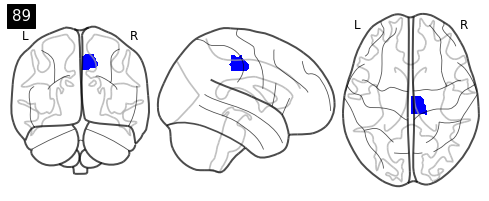

In [46]:
key_regions         = [89]
key_regions_label   = [89]
colorlist           = ['blue']

for count in range(1):  
    curr_region_dictidx = key_regions[count]
    print(shen_dict[curr_region_dictidx])

    all_file       = '../data_realcost/masker/shen_2mm_268_parcellation.nii'
    all_img        = nilearn.image.load_img(all_file)
    cmb_data       = all_img.get_fdata()

    cmb_data[np.where(cmb_data!= curr_region_dictidx)] = 0
    all_new_img    = new_img_like(all_img, cmb_data.astype(int))

    current_title  = key_regions_label[count]
    display = plotting.plot_glass_brain(None,
                                           title = current_title)
    display.add_contours(all_new_img, filled=True, colors=colorlist[count])
    plt.show()

take precuneus mask, extract every voxel and then compute a precuneus viewing pattern 

{'coords': [8.047619047619051, -22.923809523809524, 44.99047619047619], 'name': '47.38% Precentral_Gyrus; 46.19% Cingulate_Gyrus_posterior_division; 5.24% Cingulate_Gyrus_anterior_division'}


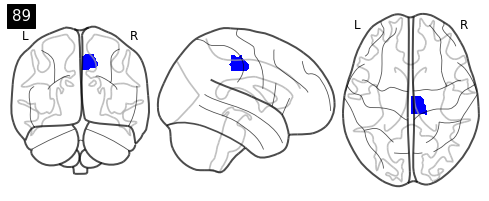

'47.38% Precentral_Gyrus; 46.19% Cingulate_Gyrus_posterior_division; 5.24% Cingulate_Gyrus_anterior_division'

In [47]:
def check_region(dict, region_num, filepath="../data_realcost/masker/shen_2mm_268_parcellation.nii"):
    
    key_regions         = [region_num]
    key_regions_label   = [region_num]
    colorlist           = ['blue']
    name = dict[region_num]['name']
    
    for count in range(1):  
        curr_region_dictidx = key_regions[count]
        print(dict[curr_region_dictidx])

        all_file       = filepath
        all_img        = nilearn.image.load_img(all_file)
        all_data       = all_img.get_fdata()

        all_data[np.where(all_data!= curr_region_dictidx)] = 0
        all_new_img    = new_img_like(all_img, all_data.astype(int))

        current_title  = key_regions_label[count]
        display = plotting.plot_glass_brain(None,
                                           title = current_title)
        display.add_contours(all_new_img, filled=True, colors=colorlist[count])
        plt.show()
        
    return name

check_region(shen_dict,89)

(1, 268)


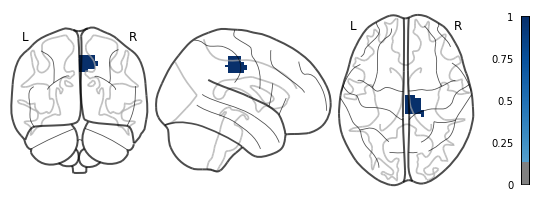

In [50]:
#sanity check for check_region function, minus 1 though! dictionary is 1 indexed, masker is 0 indexed
r2       = np.zeros((1,268))
r2[0,88] = 1
print(r2.shape)

res_img  = shen_masker.inverse_transform(r2);
plotting.plot_glass_brain(nilearn.image.index_img(res_img,0), 
                          colorbar=True, 
                          annotate = True,
                          cmap="Blues", 
                          threshold=0.15,
                          plot_abs=False, 
                         );

# ads and imagining across people, not adjusted for what ad they viewed 

In [54]:
view_length    = 30
imagine_length = 10

(40, 268)
(268,)


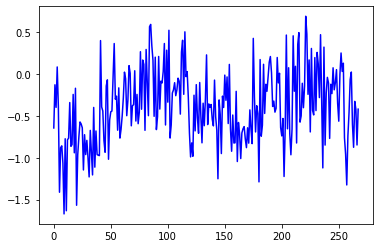

In [55]:
view_ad_1   = np.mean(all_data[:, onsets_view[0]: (onsets_view[0]+view_length), :], axis = 1)
view_ad_2   = np.mean(all_data[:, onsets_view[1]: (onsets_view[1]+view_length), :], axis = 1)
view_ad_3   = np.mean(all_data[:, onsets_view[2]: (onsets_view[2]+view_length), :], axis = 1)
view_ad_4   = np.mean(all_data[:, onsets_view[3]: (onsets_view[3]+view_length), :], axis = 1)
view_ad_5   = np.mean(all_data[:, onsets_view[4]: (onsets_view[4]+view_length), :], axis = 1)
view_ad_6   = np.mean(all_data[:, onsets_view[5]: (onsets_view[5]+view_length), :], axis = 1)
view_ad_7   = np.mean(all_data[:, onsets_view[6]: (onsets_view[6]+view_length), :], axis = 1)
view_ad_8   = np.mean(all_data[:, onsets_view[7]: (onsets_view[7]+view_length), :], axis = 1)
view_ad_9   = np.mean(all_data[:, onsets_view[8]: (onsets_view[8]+view_length), :], axis = 1)
view_ad_10  = np.mean(all_data[:, onsets_view[9]: (onsets_view[9]+view_length), :], axis = 1)
view_ad_11  = np.mean(all_data[:, onsets_view[10]: (onsets_view[10]+view_length), :], axis = 1)
view_ad_12  = np.mean(all_data[:, onsets_view[11]: (onsets_view[11]+view_length), :], axis = 1)
print(view_ad_1.shape)
print(view_ad_1[0,:].shape)

#plot average brain activity across people in specific region, here it's precuneus 
#part of brain/
plt.plot(view_ad_1[0,:], color='blue') 

In [56]:
imagine_ad_1 = np.mean(all_data[:, onsets_imagine[0]: (onsets_imagine[0]+imagine_length), :], axis = 1)
imagine_ad_2 = np.mean(all_data[:, onsets_imagine[1]: (onsets_imagine[1]+imagine_length), :], axis = 1)
imagine_ad_3 = np.mean(all_data[:, onsets_imagine[2]: (onsets_imagine[2]+imagine_length), :], axis = 1)
imagine_ad_4 = np.mean(all_data[:, onsets_imagine[3]: (onsets_imagine[3]+imagine_length), :], axis = 1)
imagine_ad_5 = np.mean(all_data[:, onsets_imagine[4]: (onsets_imagine[4]+imagine_length), :], axis = 1)
imagine_ad_6 = np.mean(all_data[:, onsets_imagine[5]: (onsets_imagine[5]+imagine_length), :], axis = 1)
imagine_ad_7 = np.mean(all_data[:, onsets_imagine[6]: (onsets_imagine[6]+imagine_length), :], axis = 1)
imagine_ad_8 = np.mean(all_data[:, onsets_imagine[7]: (onsets_imagine[7]+imagine_length), :], axis = 1)
imagine_ad_9 = np.mean(all_data[:, onsets_imagine[8]: (onsets_imagine[8]+imagine_length), :], axis = 1)
imagine_ad_10 = np.mean(all_data[:, onsets_imagine[9]: (onsets_imagine[9]+imagine_length), :], axis = 1)
imagine_ad_11 = np.mean(all_data[:, onsets_imagine[10]: (onsets_imagine[10]+imagine_length), :], axis = 1)
imagine_ad_12 = np.mean(all_data[:, onsets_imagine[11]: (onsets_imagine[11]+imagine_length), :], axis = 1)

In [57]:
for i in range(40):
     
    avg_ad_1_intra = view_ad_1[i,:]
    avg_ad_2_intra = view_ad_2[i,:]
    avg_ad_3_intra = view_ad_3[i,:]
    avg_ad_4_intra = view_ad_4[i,:]
    avg_ad_5_intra = view_ad_5[i,:]
    avg_ad_6_intra = view_ad_6[i,:]
    avg_ad_7_intra = view_ad_7[i,:]
    avg_ad_8_intra = view_ad_8[i,:]
    avg_ad_9_intra = view_ad_9[i,:]
    avg_ad_10_intra = view_ad_10[i,:]
    avg_ad_11_intra = view_ad_11[i,:]
    avg_ad_12_intra = view_ad_12[i,:]  
    avg_imagine_1_intra = imagine_ad_1[i,:]      
    avg_imagine_2_intra = imagine_ad_2[i,:]  
    avg_imagine_3_intra = imagine_ad_3[i,:]  
    avg_imagine_4_intra = imagine_ad_4[i,:]      
    avg_imagine_5_intra = imagine_ad_5[i,:]  
    avg_imagine_6_intra = imagine_ad_6[i,:]
    avg_imagine_7_intra = imagine_ad_7[i,:]      
    avg_imagine_8_intra = imagine_ad_8[i,:]  
    avg_imagine_9_intra = imagine_ad_9[i,:]
    avg_imagine_10_intra = imagine_ad_10[i,:]      
    avg_imagine_11_intra = imagine_ad_11[i,:]  
    avg_imagine_12_intra = imagine_ad_12[i,:]

In [58]:
ad_intras = [avg_ad_1_intra,
            avg_ad_2_intra, 
            avg_ad_3_intra,
            avg_ad_4_intra,
            avg_ad_5_intra, 
            avg_ad_6_intra, 
            avg_ad_7_intra, 
            avg_ad_8_intra, 
            avg_ad_9_intra,
            avg_ad_10_intra,
            avg_ad_11_intra,
            avg_ad_12_intra]  
    
imagine_intras=[avg_imagine_1_intra,       
                avg_imagine_2_intra, 
                avg_imagine_3_intra, 
                avg_imagine_4_intra,     
                avg_imagine_5_intra, 
                avg_imagine_6_intra,
                avg_imagine_7_intra,     
                avg_imagine_8_intra,
                avg_imagine_9_intra,
                avg_imagine_10_intra,     
                avg_imagine_11_intra,
                avg_imagine_12_intra]

In [7]:
#2 set up the masker and fit it on some file
shen_masker     = NiftiLabelsMasker(labels_img= atlas_filename);
shen_masker.fit_transform(sample_file);


#3 do the results computation you want to visualize, leading to a vector with e.g. 1,268 values
region_vector_v = np.zeros((1,268))
print(e)
region_vector_i = np.zeros((1,268))
region_vector_v[0, :] = view_ad_1[0,:]
region_vector_i[0, :] = imagine_ad_1[0,:]
plt.plot(region_vector_v.T)
plt.plot(region_vector_i.T);

#4 "map" that vector back into the brain space, i.e. inverse transform the masker
region_img_v = shen_masker.inverse_transform(region_vector_v);
region_img_i = shen_masker.inverse_transform(region_vector_i);

#5 plot the results via nilearn plotting
nilearn.plotting.plot_stat_map(nilearn.image.index_img(region_img_v,0),threshold = 0.45, vmax = 1., 
                                       cmap = 'Greens');
plt.show()
#view = nilearn.plotting.view_img(nilearn.image.index_img(region_img,0));
#view

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


NameError: name 'view_ad_1' is not defined

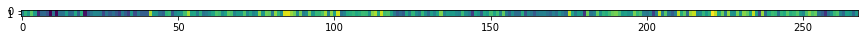

In [60]:
plt.figure(figsize = (15,3))
plt.imshow(np.stack((view_ad_1[0,:], view_ad_1[0,:])))

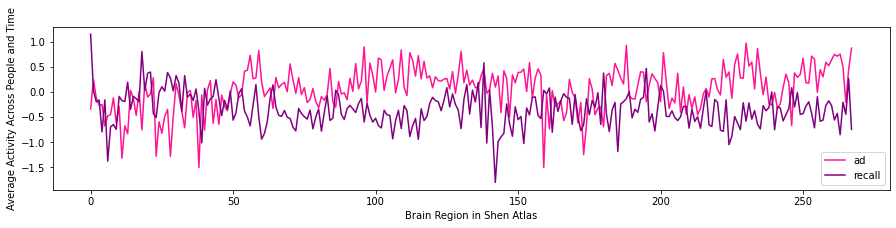

In [61]:
plt.figure(figsize = (15,3))
plt.plot(avg_ad_1_intra, label="ad", color="deeppink")
plt.plot(avg_imagine_1_intra,label="recall", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Average Activity Across People and Time")
plt.legend(loc=0)
#np.corrcoef(view_ad_1, imagine_ad_1)

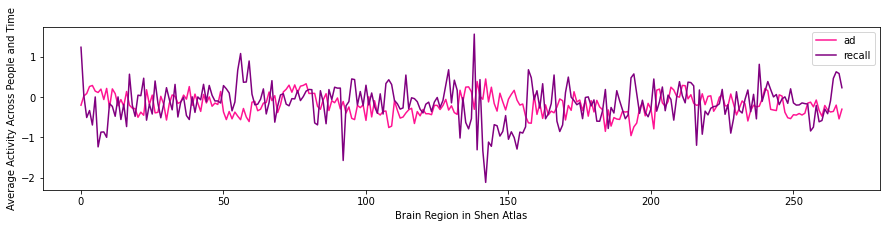

In [62]:
plt.figure(figsize = (15,3))
plt.plot(avg_ad_2_intra, label="ad", color="deeppink")
plt.plot(avg_imagine_2_intra,label="recall", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Average Activity Across People and Time")
plt.legend(loc=0)
#np.corrcoef(view_ad_1, imagine_ad_1)

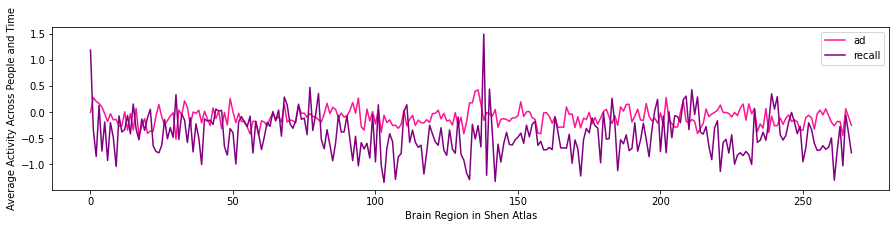

In [63]:
plt.figure(figsize = (15,3))
plt.plot(avg_ad_3_intra, label="ad", color="deeppink")
plt.plot(avg_imagine_3_intra,label="recall", color= "purple")
plt.xlabel("Brain Region in Shen Atlas")
plt.ylabel("Average Activity Across People and Time")
plt.legend(loc=0)
#np.corrcoef(view_ad_1, imagine_ad_1)

In [64]:
toy_ad_1 = np.zeros(avg_ad_1_intra.shape)
print(toy_ad_1)
np.corrcoef(avg_ad_1_intra,avg_imagine_1_intra)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


array([[ 1.        , -0.30234519],
       [-0.30234519,  1.        ]])

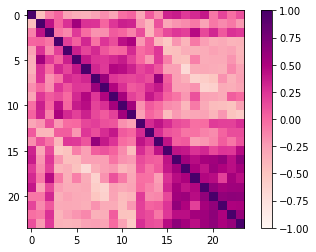

In [65]:
vectors = np.vstack((avg_ad_1_intra,
                     avg_ad_2_intra,
                     avg_ad_3_intra,
                     avg_ad_4_intra,
                     avg_ad_5_intra,
                     avg_ad_6_intra,
                     avg_ad_7_intra,
                     avg_ad_8_intra,
                     avg_ad_9_intra,
                     avg_ad_10_intra,
                     avg_ad_11_intra,
                     avg_ad_12_intra,
                     avg_imagine_1_intra,
                     avg_imagine_2_intra,
                     avg_imagine_3_intra,
                     avg_imagine_4_intra,
                     avg_imagine_5_intra,
                     avg_imagine_6_intra,
                     avg_imagine_7_intra,
                     avg_imagine_8_intra,
                     avg_imagine_9_intra,
                     avg_imagine_10_intra,
                     avg_imagine_11_intra,
                     avg_imagine_12_intra))

#print(imagine_ad_1.shape)
plt.imshow(np.corrcoef(vectors), cmap = 'RdPu', vmin = -1, vmax = 1);
plt.colorbar()

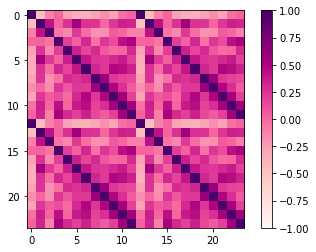

In [66]:
vectors = np.vstack((avg_ad_1_intra,
                     avg_ad_2_intra,
                     avg_ad_3_intra,
                     avg_ad_4_intra,
                     avg_ad_5_intra,
                     avg_ad_6_intra,
                     avg_ad_7_intra,
                     avg_ad_8_intra,
                     avg_ad_9_intra,
                     avg_ad_10_intra,
                     avg_ad_11_intra,
                     avg_ad_12_intra,
                     avg_ad_1_intra,
                     avg_ad_2_intra,
                     avg_ad_3_intra,
                     avg_ad_4_intra,
                     avg_ad_5_intra,
                     avg_ad_6_intra,
                     avg_ad_7_intra,
                     avg_ad_8_intra,
                     avg_ad_9_intra,
                     avg_ad_10_intra,
                     avg_ad_11_intra,
                     avg_ad_12_intra))

#print(imagine_ad_1.shape)
plt.imshow(np.corrcoef(vectors), cmap = 'RdPu', vmin = -1, vmax = 1);
plt.colorbar()

In [67]:
roi = 89

view_ads = [view_ad_1,view_ad_2,view_ad_3,view_ad_4,view_ad_5,view_ad_6,
            view_ad_7,view_ad_8,view_ad_9,view_ad_10,view_ad_11,view_ad_12]

imagine_ads = [imagine_ad_1,imagine_ad_2,imagine_ad_3,imagine_ad_4,imagine_ad_5,imagine_ad_6,
            imagine_ad_7,imagine_ad_8,imagine_ad_9,imagine_ad_10,imagine_ad_11,imagine_ad_12]


for i in range(12):
    corcoef_ads = []
    cor = np.corrcoef(view_ads[i][:,roi], imagine_ads[i][:,roi])[0,1]
    print(np.corrcoef(view_ads[i][:,roi], imagine_ads[i][:,roi])[0,1])
    corcoef_ads.append(cor)

print(corcoef_ads)

corcoef_ad = [-0.6739030870712747,
              -0.41116691173000025,
              -0.3410988111859222,
              -0.4766760089509342,
              -0.05299687908186617,
              -0.4096732405191169,
              -0.3333513773016511,
              -0.27313033708055484,
              -0.5261261724824301,
              -0.23675027784164226,
              -0.43369277644486565,
              -0.3132939889146413]

avg_ad_cor = np.mean(corcoef_ads)
print('The average correlation coefficient between viewing and imagining an ad is',round(avg_ad_cor,3))

-0.6739030870712747
-0.41116691173000025
-0.3410988111859222
-0.4766760089509342
-0.05299687908186617
-0.4096732405191169
-0.3333513773016511
-0.27313033708055484
-0.5261261724824301
-0.23675027784164226
-0.43369277644486565
-0.3132939889146413
[-0.3132939889146413]
The average correlation coefficient between viewing and imagining an ad is -0.313


# Extra code for later, not currently working

onset key


* 1=0
* 4=1
* 7=2
* 10=3
* 16=4
* 19=5
* 22=6
* 25=7
* 28=9
* 31=10
* 34=11


In [68]:
import pandas as pd

def read_onsets(curr_subject):
    df = pd.read_csv('../data_realcost/onsets/Onsets_RealCost_View_' + curr_subject + '.csv', encoding="ISO-8859-1") 
    return df
     
onset_PSA038 = read_onsets('PSA038')
onset_PSA009 = read_onsets('PSA009')
onset_PSA078 = read_onsets('PSA078')
onset_PSA153 = read_onsets('PSA153')
onset_PSA131 = read_onsets('PSA131')
onset_PSA086 = read_onsets('PSA086')
onset_PSA144 = read_onsets('PSA144')
onset_PSA108 = read_onsets('PSA108')
onset_PSA030 = read_onsets('PSA030')
onset_PSA041 = read_onsets('PSA041')
onset_PSA068 = read_onsets('PSA068')
onset_PSA056 = read_onsets('PSA056')
onset_PSA132 = read_onsets('PSA132')
onset_PSA019 = read_onsets('PSA019')
onset_PSA027 = read_onsets('PSA027')
onset_PSA028 = read_onsets('PSA028')
onset_PSA016 = read_onsets('PSA016')
onset_PSA005 = read_onsets('PSA005')
onset_PSA061 = read_onsets('PSA061')
onset_PSA010 = read_onsets('PSA010')
onset_PSA128 = read_onsets('PSA128')
onset_PSA003 = read_onsets('PSA003')
onset_PSA156 = read_onsets('PSA156')
onset_PSA119 = read_onsets('PSA119')
onset_PSA032 = read_onsets('PSA032')
onset_PSA127 = read_onsets('PSA127')
onset_PSA079 = read_onsets('PSA079')
onset_PSA094 = read_onsets('PSA094')
onset_PSA008 = read_onsets('PSA008')
onset_PSA036 = read_onsets('PSA036')
onset_PSA112 = read_onsets('PSA112')
onset_PSA007 = read_onsets('PSA007')
onset_PSA151 = read_onsets('PSA151')
onset_PSA120 = read_onsets('PSA120')
onset_PSA017 = read_onsets('PSA017')
onset_PSA029 = read_onsets('PSA029')
onset_PSA026 = read_onsets('PSA026')
onset_PSA069 = read_onsets('PSA069')
onset_PSA142 = read_onsets('PSA142')
onset_PSA109 = read_onsets('PSA109')

onsets_order = [onset_PSA038,
            onset_PSA009,
            onset_PSA078,
            onset_PSA153,
            onset_PSA131,
            onset_PSA086,
            onset_PSA144,
            onset_PSA108,
            onset_PSA030,
            onset_PSA041,
            onset_PSA068,
            onset_PSA056,
            onset_PSA132,
            onset_PSA019,
            onset_PSA027,
            onset_PSA028,
            onset_PSA016,
            onset_PSA005,
            onset_PSA061,
            onset_PSA010,
            onset_PSA128,
            onset_PSA003,
            onset_PSA156,
            onset_PSA119,
            onset_PSA032,
            onset_PSA127,
            onset_PSA079,
            onset_PSA094,
            onset_PSA008,
            onset_PSA036,
            onset_PSA112,
            onset_PSA007,
            onset_PSA151,
            onset_PSA120,
            onset_PSA017,
            onset_PSA029,
            onset_PSA026,
            onset_PSA069,
            onset_PSA142,
            onset_PSA109]

onsets_order[0]

for onset in range(40):
    print(np.where(onsets_order[onset]['PSA'] == '01_The Real Cost Commercial-Your Skin-.mov'))

view_ads = [view_ad_1,view_ad_2,view_ad_3,view_ad_4,view_ad_5,view_ad_6,
            view_ad_7,view_ad_8,view_ad_9,view_ad_10,view_ad_11,view_ad_12]

imagine_ads = [imagine_ad_1,imagine_ad_2,imagine_ad_3,imagine_ad_4,imagine_ad_5,imagine_ad_6,
            imagine_ad_7,imagine_ad_8,imagine_ad_9,imagine_ad_10,imagine_ad_11,imagine_ad_12]



#find where each video for each participant is in onsets
#then account for imagine is that spot +1, be sure to keep this together so if view_ad_1 = 10, imagine_ad_1 = 11

(array([7]),)
(array([34]),)
(array([13]),)
(array([4]),)
(array([28]),)
(array([22]),)
(array([13]),)
(array([22]),)
(array([4]),)
(array([19]),)
(array([31]),)
(array([16]),)
(array([1]),)
(array([25]),)
(array([1]),)
(array([4]),)
(array([7]),)
(array([13]),)
(array([28]),)
(array([13]),)
(array([7]),)
(array([10]),)
(array([16]),)
(array([25]),)
(array([13]),)
(array([22]),)
(array([25]),)
(array([22]),)
(array([22]),)
(array([34]),)
(array([19]),)
(array([28]),)
(array([22]),)
(array([4]),)
(array([13]),)
(array([13]),)
(array([28]),)
(array([28]),)
(array([34]),)
(array([22]),)


In [ ]:
spots = ['01_The Real Cost Commercial-Your Skin',
         '02_The Real Cost Commercial-Your Teeth',
         '03_The Real Cost Commercial-Alison',
         '04_The Real Cost Commercial-Stay In Control',
         '05_The Real Cost Commercial-Bully',
         '06_The Real Cost Commercial-#7000chemicals',
         '07_The Real Cost Commercial-Dance30_2015_04_10_TESFA',
         '08_The Real Cost Commercial-Band_30_2015_04_10_TESFA',
         '09_The Real Cost Commercial-#ReasonsNotToSmoke',
         '10_The Real Cost Commercial-Any Reason',
         '11_The Real Cost Commercial-Science Class',
         '12_The Real Cost Commercial-Found It']
n_spots = len(spots)